## This is a beginner Exploratory Data Analysis (EDA) of the dataset "120 years of Olympic history: athletes and results"

In [1]:
# We will be doing basic EDA using pandas & numpy libraries for initial data cleaning and then using
# matplotlib and seaborn to make visualizations to find out trends and patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data files for athletes and region data

athletes = pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
region = pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

In [3]:
# To view first 5 rows of the dataframe

athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Now, we will merge both the dataframes into single dataframe using 'region' as key field

athlete_df = athletes.merge(region, how='left', on = 'NOC')
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
# To find how many rows & columns are there in the dataframe

athlete_df.shape

(271116, 17)

In [7]:
# Rename columns to make dataframe consistent

athlete_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [8]:
# To view the column names of the dataframe

athlete_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [9]:
# For veiwing basic information about the dataframe

athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
# To find out the number of NaN (null values) in the dataframe columnwise

athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
# Print column names containing null values or missing values in form of a list

nan_values = athlete_df.isna()
nan_columns = nan_values.any()
nan_list = athlete_df.columns[nan_columns].tolist()
nan_list

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [13]:
# To filter/view the datframe on the basis of certain conditions we can query the dataframe
# For example, to view the entries of Indian Team

athlete_df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
athlete_df.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [15]:
# Top 10 countries participating which have most number of participants

top_10_countries = athlete_df.Team.value_counts().sort_values(ascending = False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation of Countries'}, xlabel='Team', ylabel='Countries'>

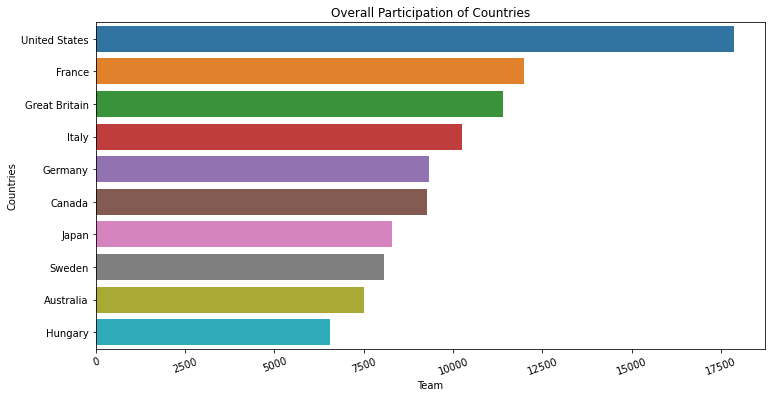

In [16]:
# Bar Plot for top 10 countries

plt.figure(figsize=(12,6))
plt.title('Overall Participation of Countries')
plt.xticks(rotation=20)
plt.xlabel('Participation')
plt.ylabel('Countries')
sns.barplot(x = top_10_countries, y = top_10_countries.index)

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

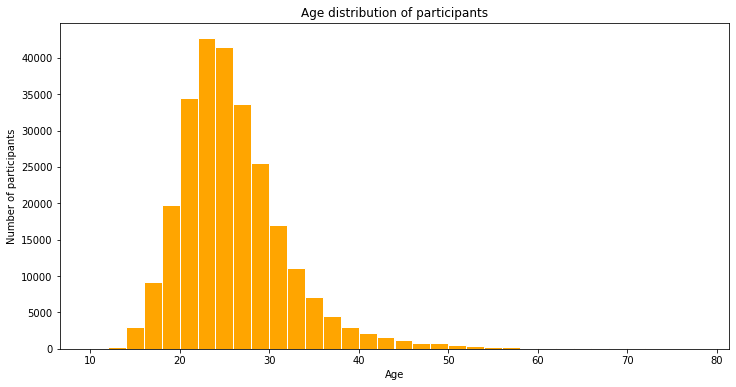

In [17]:
# Age distribution of participants in form of Histogram

plt.figure(figsize=(12,6))
plt.title('Age distribution of participants')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athlete_df.Age, bins=np.arange(10,80,2), color='orange', edgecolor='white')

We can see most number of participants are in the age group of 22 to 26

In [18]:
# Creating a dataframe for Winter Sports

winter_sports = athlete_df[athlete_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [19]:
# Creating a dataframe for Summer Sports

summer_sports = athlete_df[athlete_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [20]:
# Number of Male and Female Participants

gender_count = athlete_df.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3727334850>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

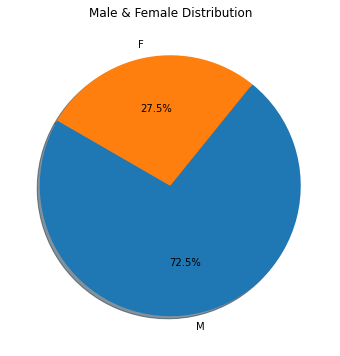

In [21]:
# Pie Chart for Male & Female districution

plt.figure(figsize=(12,6))
plt.title('Male & Female Distribution')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)

In [22]:
# Medal count in all the Olympic events

athlete_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [23]:
# Female participation every year

female_participation = athlete_df[ (athlete_df.Sex == 'F') & (athlete_df.Season == 'Summer')][['Sex', 'Year']]
female_participation = female_participation.groupby("Year").count().reset_index()
female_participation

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


<AxesSubplot:title={'center':'Women Participation'}, xlabel='Year', ylabel='Sex'>

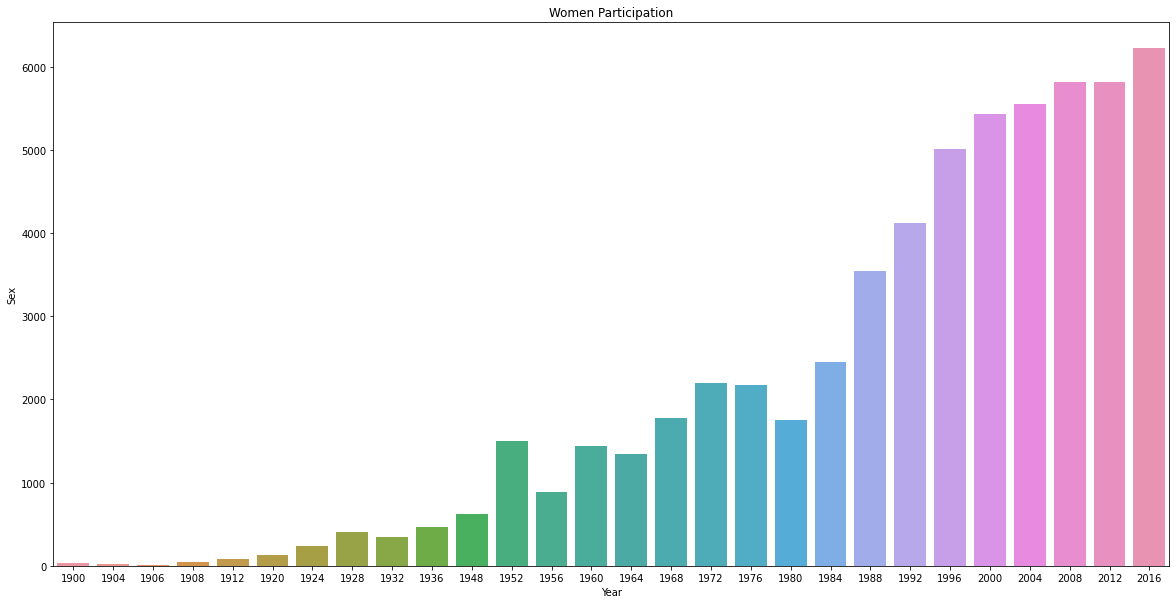

In [24]:
# Bar plot to show female participation every year

plt.figure(figsize=(20,10))
plt.title('Women Participation')
plt.ylabel('Count')
sns.barplot(x=female_participation.Year, y=female_participation.Sex)

A steady increase in female participation can be seen over the years

In [25]:
# Create a dataframe for Gold medal athletes

goldMedal = athlete_df[(athlete_df.Medal == "Gold")]
goldMedal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [26]:
# remove players having NaN value as their Age

goldMedal = goldMedal[np.isfinite(goldMedal['Age'])]

In [27]:
# Count of players who won Gold medal beyond Age 60

#goldMedal['ID'][goldMedal['Age'] > 60].count()

goldMedal.query('Age > 60').ID.count()

6

In [28]:
# sporting event in which atheletes above age 60 won gold medals

sporting_event = goldMedal['Sport'][goldMedal['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Gold medals for Athletes above Age 60'}, xlabel='Sport', ylabel='count'>

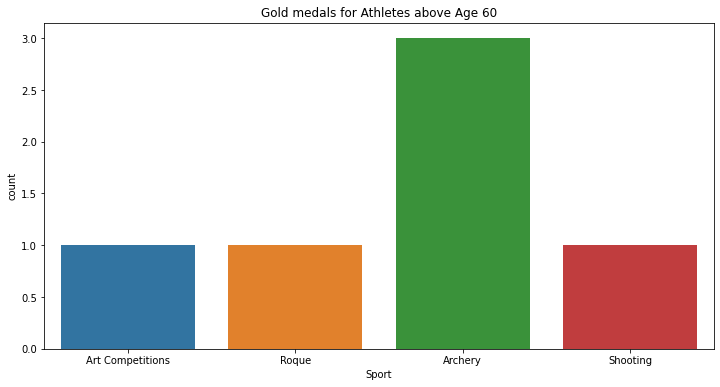

In [29]:
#count plot for above spoting events

plt.figure(figsize=(12,6))
plt.title("Gold medals for Athletes above Age 60")
sns.countplot(sporting_event)

In [30]:
#Gold medals distribution for each country

goldMedal.Region.value_counts().reset_index(name="Medal").head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Top 6 countries with most gold medals')

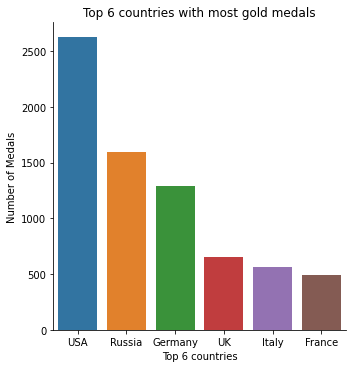

In [31]:
# Top 6 countries with most gold medals in Olympic history

totalGoldMedals = goldMedal.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x="index", y='Medal', data=totalGoldMedals, kind='bar')
g.set_xlabels('Top 6 countries')
g.set_ylabels('Number of Medals')
plt.title('Top 6 countries with most gold medals')

In [32]:
# Countrywise Gold medal count in Rio Olympics 2016

max_year = athlete_df.Year.max()

team_names = athlete_df[ (athlete_df.Year == max_year) & (athlete_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 1.0, 'Countrywise medal count for Rio 2016 Olympics')

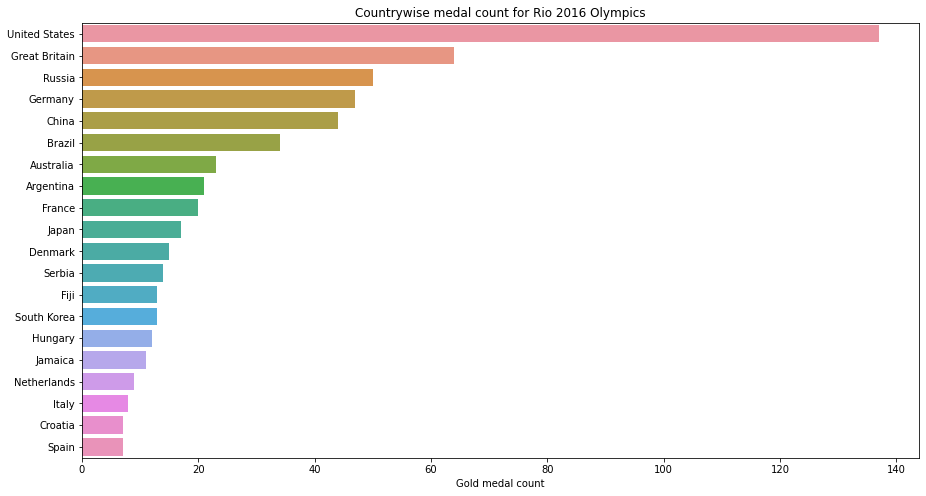

In [33]:
# Bar plot for above data

plt.figure(figsize=(15,8))
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Gold medal count')
plt.title('Countrywise medal count for Rio 2016 Olympics')

Text(0.5, 1.0, 'Height-Weight distribution of medal winning athletes')

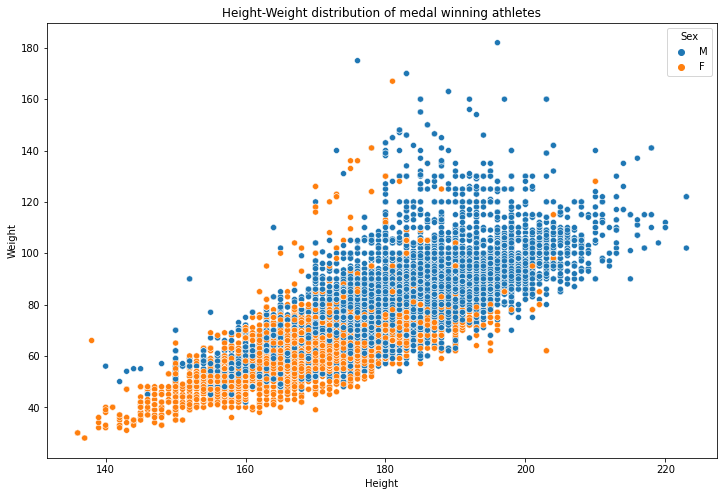

In [34]:
#Scatterplot of height & weight of medal winning athletes

medal_athletes = athlete_df[ (athlete_df["Height"].notnull()) & (athlete_df['Weight'].notnull()) & (athlete_df['Medal'].notnull())]

plt.figure(figsize=(12,8))
sns.scatterplot(x='Height', y='Weight', data=medal_athletes, hue='Sex')
plt.title('Height-Weight distribution of medal winning athletes')

(array([0.000e+00, 7.000e+00, 1.020e+02, 3.150e+02, 7.390e+02, 1.599e+03,
        2.232e+03, 2.191e+03, 1.839e+03, 1.451e+03, 9.280e+02, 6.490e+02,
        3.940e+02, 2.140e+02, 1.540e+02, 1.170e+02, 7.400e+01, 5.800e+01,
        4.800e+01, 3.600e+01, 1.600e+01, 1.800e+01, 1.600e+01, 1.200e+01,
        5.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]),
 <BarContainer object of 29 artists>)

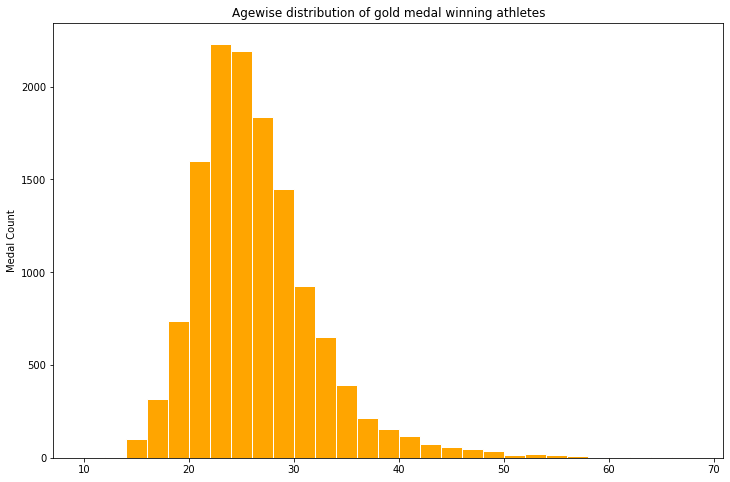

In [35]:
# Age distribution of gold medal winning athletes

goldMedal_age = goldMedal.Age.value_counts().reset_index(name='Medal_count')

plt.figure(figsize=(12,8))
plt.title('Agewise distribution of gold medal winning athletes')
plt.ylabel('Medal Count')
plt.hist(goldMedal.Age, bins=np.arange(10,70,2), color='orange', edgecolor='white')